*We will provide data sources used in this script  <br>
after the research publication of this work will be accepted*

In [1]:
%matplotlib inline

# //-------------------------------------------------------------\\

# Imports
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt

# //-------------------------------------------------------------\\

In [2]:
# Some defaults

# //-------------------------------------------------------------\\

mpl.rcParams['figure.figsize'] = [14, 10]
colors = {'white red':'#FFA7A7',
          'dark red' :'#8C080A',
          'gray': '#C7C7C7',
          'salmon' : '#FFE5CB',
          'white green':'#B2DF8A',
          'dark green':'#076F18',
          'brown': '#D8C3AD',
          'brown_':'#9F8048',
          'white purple':'#E3BBFF',
          'dark purple':'#4A0080',
          'blue':'#1A67FF'
         }
crs_rep = {'init': 'epsg:6372'}

# //-------------------------------------------------------------\\

---

# Agricultural irrigation ponds detection; 
# A case study, the green gold fringe in central Mexico

Mexico is the leading avocado producer in the world. By 2018, the country produced <br>
one-third of global production in nearly 235,000 hectares dedicated to this culture. <br>
The state of Michoacan in central Mexico holds the first place in national production, <br>
and contributes with 77% of it. During the last decade avocado-related land use changes <br>
had occurred to the expense of native forests.

---

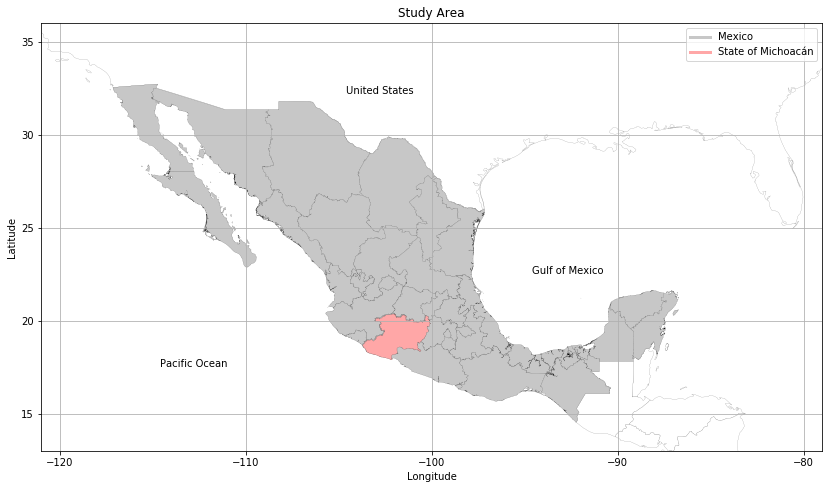

In [3]:
# Study area
# Macro geolocalization
america = '../Data/shapefiles/America.shp'
mexico = '../Data/shapefiles/Mexico.shp'
michoacan = '../Data/shapefiles/Michoacan.shp'

america = gpd.read_file(america)
mexico = gpd.read_file(mexico)
michoacan = gpd.read_file(michoacan)

# Plot
ax = america.iloc[[7,19,25,28,34,52]].plot(color='white', edgecolor='black', linewidth=0.1)
mexico.plot(color=colors['gray'], edgecolor='black', linewidth=0.1, ax=ax)
michoacan.plot(color=colors['white red'], edgecolor='black', linewidth=0.1, ax=ax)
ax.set_xlim(-121, -79)
ax.set_ylim(13, 36)
ax.locator_params(axis='x', nbins=6)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Study Area')
ax.text(-104.6, 32.2, 'United States')
ax.text(-94.6, 22.5, 'Gulf of Mexico')
ax.text(-114.6, 17.5, 'Pacific Ocean')

# Legend
ax.plot([],[], color=colors['gray'], label='Mexico', linewidth=3)
ax.plot([],[], color=colors['white red'], label='State of Michoacán', linewidth=3)
ax.legend(loc='best')

plt.grid()
plt.show()

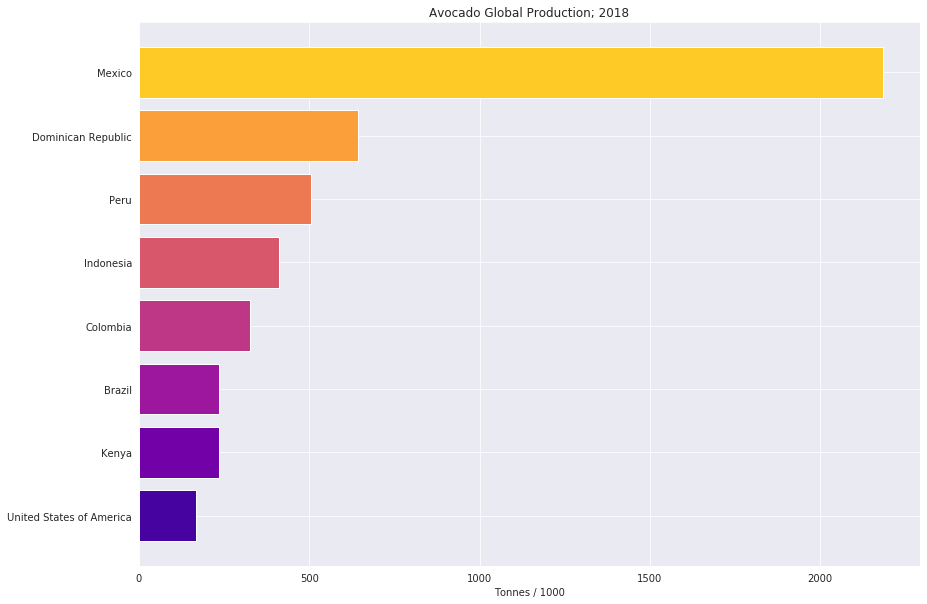

In [4]:
# Data Source:http://www.fao.org/faostat/en/#data/QC

d = pd.read_csv('../Data/csv_files/FAOSTAT_data_3-10-2020.csv')
x = d[(d['Element'] == 'Production')&(d['Year'] == d['Year'].max())]
x = x[~x['Value'].isna()]
x = x['Value'].sort_values()[-8:]
country = d['Area'][x.index]
values = d['Value'][x.index] / 1000
y_pos = range(len(country))

with sns.axes_style('darkgrid'):
    plt.barh(y_pos, values, color=sns.color_palette('plasma', len(country)))
    plt.yticks(y_pos, labels=country)
    plt.title('Avocado Global Production; 2018')
    plt.xlabel('Tonnes / 1000')
    plt.show()

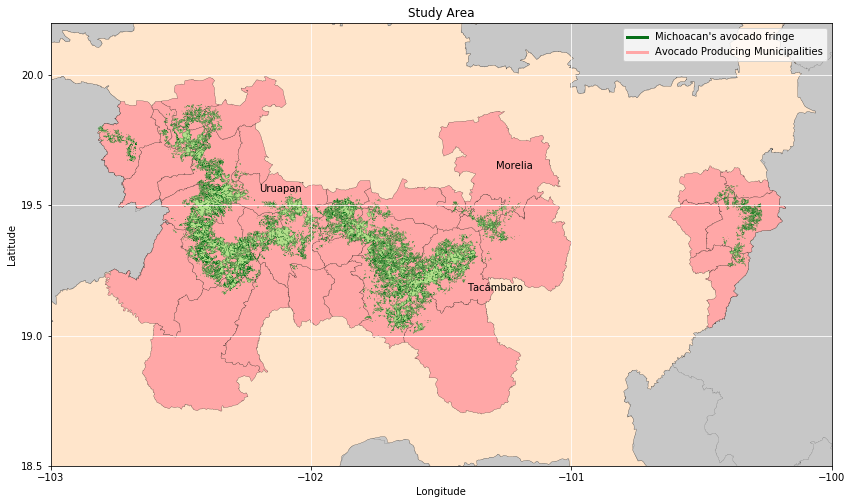

In [5]:
# Meta geolocalization

# Michoacán's avocado fringe is taken from:
#     Morales, L.M.M. y G. Cuevas, G. (2012). Inventario 2011 y evaluación del
#     impacto ambiental forestal del cultivo del aguacate en el estado de Michoacán.
#     Informe Ejecutivo. Centro de Investigaciones en Geografía Ambiental, UNAM.
#     Morelia, MICH. 10 pp.

avocado = '../Data/shapefiles/avocado.shp'
avo_michoacan = '../Data/shapefiles/avo_michoacan.shp'

avocado = gpd.read_file(avocado)
avo_michoacan = gpd.read_file(avo_michoacan)
    
# Plot
ax = mexico.plot(color=colors['gray'], edgecolor='black', linewidth=0.1)
michoacan.plot(color=colors['salmon'], edgecolor='black', linewidth=0.2, ax=ax)
avo_michoacan.plot(color=colors['white red'], edgecolor='black', linewidth=0.2, ax=ax)
avocado.plot(color=colors['white green'], edgecolor=colors['dark green'], linewidth=0.2, ax=ax)
ax.set_xlim(-103, -100.)
ax.set_ylim(18.5, 20.2)
ax.locator_params(axis='y', nbins=4)
ax.locator_params(axis='x', nbins=4)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Study Area')
ax.text(-101.29, 19.64, 'Morelia')
ax.text(-101.40, 19.17, 'Tacámbaro')
ax.text(-102.2, 19.55, 'Uruapan')

# Legend
ax.plot([],[], color=colors['dark green'], label="Michoacan's avocado fringe", linewidth=3)
ax.plot([],[], color=colors['white red'], label='Avocado Producing Municipalities', linewidth=3)
ax.legend(loc='best')

plt.grid(color='white')
plt.show()

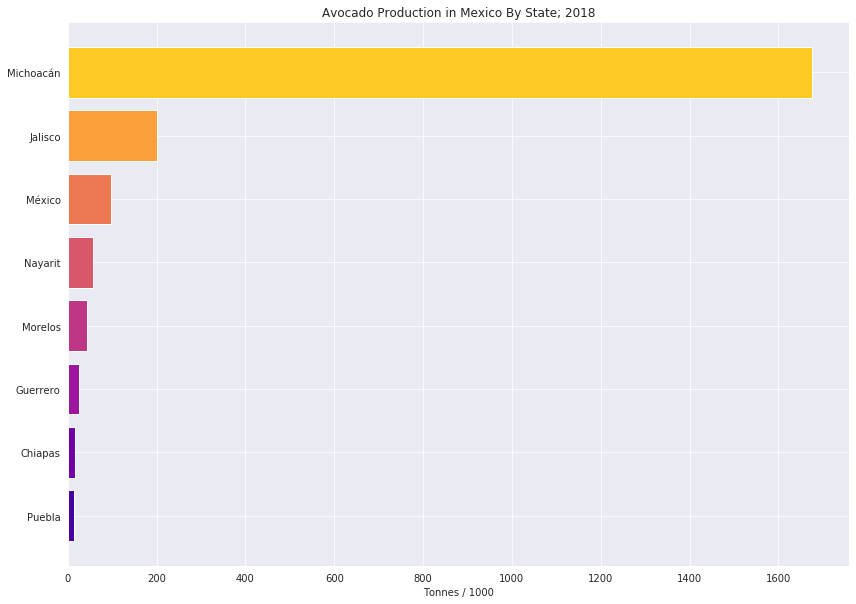

In [6]:
# Data Source: http://infosiap.siap.gob.mx/gobmx/datosAbiertos.php

d = pd.read_csv('../Data/csv_files/Mexico_Crops_2018.csv', encoding='latin-1')
x = d[d['Nomcultivo'] == 'Aguacate']
x = x.groupby('Nomestado')['Volumenproduccion'].sum().sort_values()[-8:] / 1000
y_pos = range(len(x))

with sns.axes_style('darkgrid'):
    plt.barh(y_pos, x.values, color=sns.color_palette('plasma', len(x)))
    plt.yticks(y_pos, labels=x.index)
    plt.title('Avocado Production in Mexico By State; 2018')
    plt.xlabel('Tonnes / 1000')
    plt.show()

---

Access to irrigation water is critical to increase avocado productivity, <br>
specially in areas with high evapotranspiration rates. Therefore, producers <br>
usually build water ponds with geo-membranes lining. The correct georeference <br>
location, size and shape of this type of infrastructure is key to address its hydrological impact.

In this contribution, we developed a convolutional neural network to detect <br>
avocado-related agricultural water ponds, using open-access software and <br>
high-resolution satellite imagery (pixel resolution=0.56 m) from Google-Maps.<br>

We used the trained model at Michoacan's avocado fringe. These are some of the results:

---

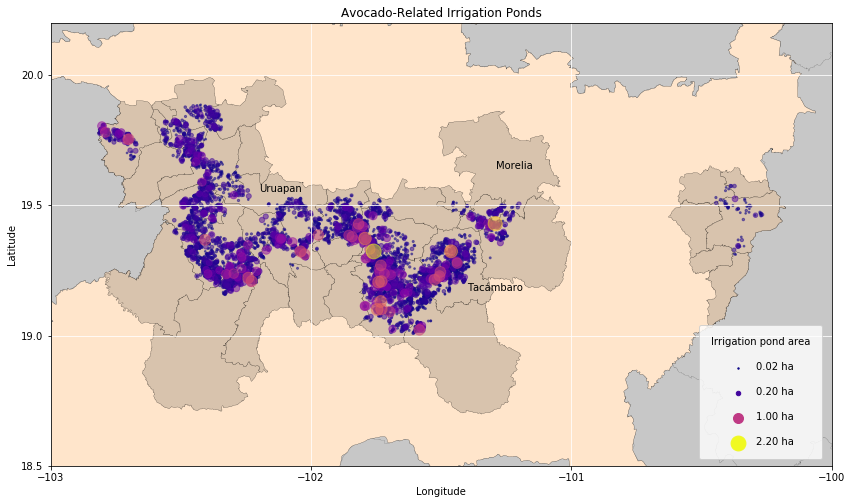

In [7]:
# Irrigation ponds inventory at Michoacan's avocado fringe
ponds = '../Data/shapefiles/ponds_2018.shp'
ponds = gpd.read_file(ponds)
ponds_centroids = np.column_stack((ponds.centroid.x, ponds.centroid.y))

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    ponds_rep = ponds.to_crs(crs_rep)

inventory = '../Data/shapefiles/inventory.shp'
inventory = gpd.read_file(inventory)
inventory = inventory[inventory.Count > 0]
inventory.rename(index=str, inplace=True, columns={'Municipali':'Municipality'})

# Plot
ax = mexico.plot(color=colors['gray'], edgecolor='black', linewidth=0.1)
michoacan.plot(color=colors['salmon'], edgecolor='black', linewidth=0.2, ax=ax)
avo_michoacan.plot(color=colors['brown'], edgecolor='black', linewidth=0.2, ax=ax)
ax.scatter(ponds_centroids[:,0], ponds_centroids[:,1], s=ponds_rep.area/100, 
            alpha=0.5, c=ponds_rep.area, cmap='plasma', label=None)
ax.set_xlim(-103, -100.)
ax.set_ylim(18.5, 20.2)
ax.locator_params(axis='y', nbins=4)
ax.locator_params(axis='x', nbins=4)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Avocado-Related Irrigation Ponds')
ax.text(-101.29, 19.64, 'Morelia')
ax.text(-101.40, 19.17, 'Tacámbaro')
ax.text(-102.2, 19.55, 'Uruapan')

# Legend
cmap = plt.cm.plasma
areas = [200, 2000, 10000, 22000]
values = [0.0, 0.1, 0.45, 1.0]
for i,j in zip(areas, values):
    ax.scatter([], [], c=[cmap(j)], s=i/100,
               label=f'{i*1e-4:.2f} ha', cmap='plasma')
ax.legend(scatterpoints=1, frameon=True, loc=(0.83,0.015),
    labelspacing=1.5, title='Irrigation pond area', borderpad=1.2)

plt.grid(color='white')
plt.show()

---

The neural network detected more than 7,600 water ponds along Michoacan's avocado fringe. <br>
The water storage surface was more than 700 ha, with an average pond size of 0.09 ha ± 0.12 ha. <br>
Nevertheless, we were able to identify and verify the occurence of water ponds larger than 2.0 ha. <br>
The information provided by the neural network allowed the generation of the first remote sensing-based <br>
inventory of water ponds associated to avocado crop in a tropical montane environment.

---

In [8]:
# Irrigation ponds inventory
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    table = inventory[['Municipality', 'Count', 'Proportion', 'Area', 'Density']]
    table['Area'] = table['Area'] * 1e-4
    table.rename(index=str, inplace=True, columns={'Area':'Area (m²)', 'Density':'Density (Km²)'})

print('Avocado-Related Irrigation Ponds')
table.sort_values(by='Count', ascending=False)

Avocado-Related Irrigation Ponds


Municipality   Count  Proportion   Area (m²)  Density (Km²)
6               Tacámbaro  1352.0    0.177614  111.113520       1.727626
11              Tancítaro  1273.0    0.167236  115.334765       1.792277
25                   Ario  1110.0    0.145822  121.615247       1.604952
16     Salvador Escalante   642.0    0.084341   65.531721       1.323503
31                Uruapan   467.0    0.061350   47.696554       0.463760
20                Peribán   439.0    0.057672   39.077051       1.331030
8           Ziracuaretiro   268.0    0.035208   21.913305       1.685075
18               Turicato   256.0    0.033631   20.743082       0.166332
1               Los Reyes   230.0    0.030215   20.716915       0.481306
28             Tingambato   179.0    0.023516   14.327874       0.949042
29                 Cotija   158.0    0.020757   20.787112       0.314937
21             Apatzingán   152.0    0.019968   16.950670       0.093091
9                Acuitzio   144.0    0.018917   17.293153       0.821552
24  Nuevo Parangaricutiro   141.0    0.018523   11.581030       0.603512
3              Tingüindín   129.0    0.016947   12.899881       0.751698
15                 Madero   113.0    0.014845   10.573081       0.111448
2                 Tocumbo    93.0    0.012218    7.721867       0.184952
0           Tangamandapio    86.0    0.011298    8.588713       0.273988
5           Tangancícuaro    86.0    0.011298    8.579075       0.224831
7                 Taretan    64.0    0.008408    8.370859       0.347706
30              Pátzcuaro    58.0    0.007620    3.698920       0.133052
19             Buenavista    49.0    0.006437    3.406274       0.053405
17              Zitácuaro    48.0    0.006306    3.215814       0.094193
23                Morelia    25.0    0.003284    1.922704       0.021100
14               Charapan    13.0    0.001708    0.723907       0.055973
32              Parácuaro     9.0    0.001182    0.651708       0.017967
4                Huiramba     8.0    0.001051    0.372385       0.101747
22           Nuevo Urecho     6.0    0.000788    0.401251       0.018254
27                 Tuxpan     5.0    0.000657    0.251847       0.020668
13                 Ocampo     3.0    0.000394    0.332804       0.021220
26         Gabriel Zamora     3.0    0.000394    0.105886       0.008210
10              Susupuato     2.0    0.000263    0.081150       0.007503
12               Jungapeo     1.0    0.000131    0.118550       0.003789

In [9]:
pd.DataFrame({'Count': [ponds_rep.shape[0]],
              'Water storage area (ha)': [ponds_rep.area.sum()*1e-4],
              'Pond mean area (ha)':[ponds_rep.area.mean()*1e-4],
              'Pond std area (ha)':[ponds_rep.area.std()*1e-4],
              'Pond min area (ha)':[ponds_rep.area.min()*1e-4],
              'Pond max area (ha)':[ponds_rep.area.max()*1e-4]})

Count  Water storage area (ha)  Pond mean area (ha)  Pond std area (ha)  \
0   7621               717.880984             0.094198            0.121273   

   Pond min area (ha)  Pond max area (ha)  
0            0.026011            2.232344

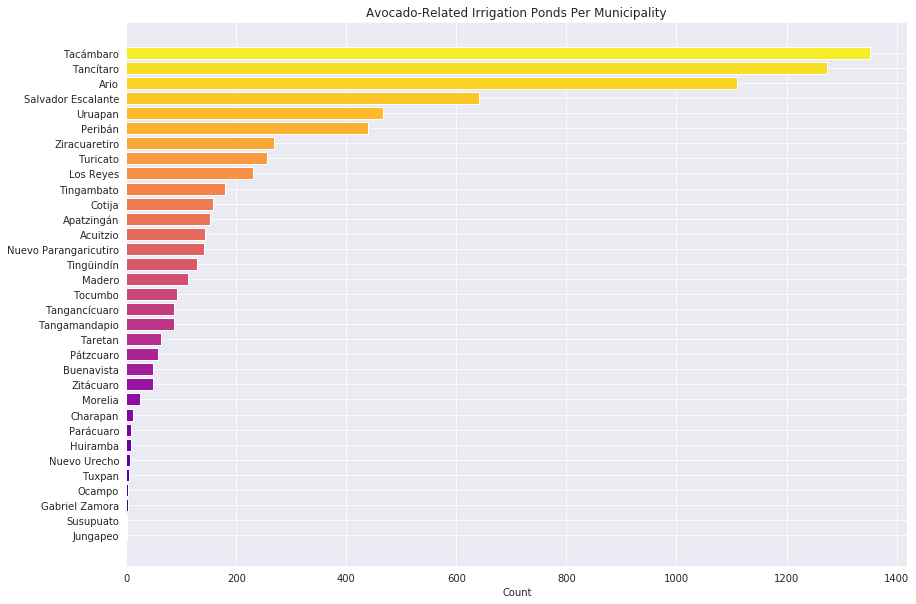

In [10]:
with sns.axes_style('darkgrid'):
    muns = inventory.Municipality[inventory.Count.sort_values().index]
    y_pos = range(len(muns))
    counts = inventory.Count[muns.index]
    plt.barh(y_pos, counts, color=sns.color_palette('plasma', len(muns)))
    plt.yticks(y_pos, labels=muns)
    plt.xlabel('Count')
    plt.title('Avocado-Related Irrigation Ponds Per Municipality')
    plt.show()

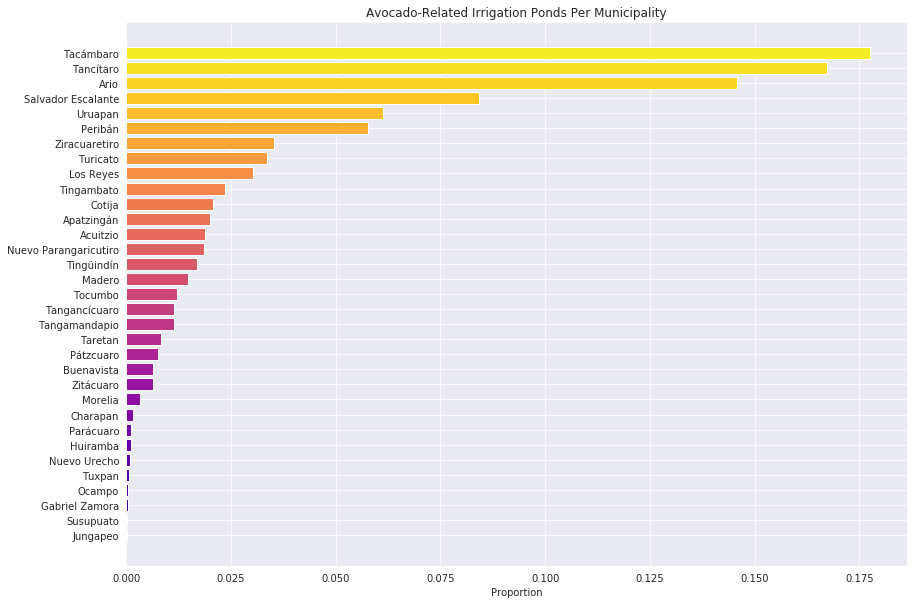

In [11]:
with sns.axes_style('darkgrid'):
    muns = inventory.Municipality[inventory.Proportion.sort_values().index]
    y_pos = range(len(muns))
    p = inventory.Proportion[muns.index]
    plt.barh(y_pos, p, color=sns.color_palette('plasma', len(muns)))
    plt.yticks(y_pos, labels=muns)
    plt.xlabel('Proportion')
    plt.title('Avocado-Related Irrigation Ponds Per Municipality')
    plt.show()

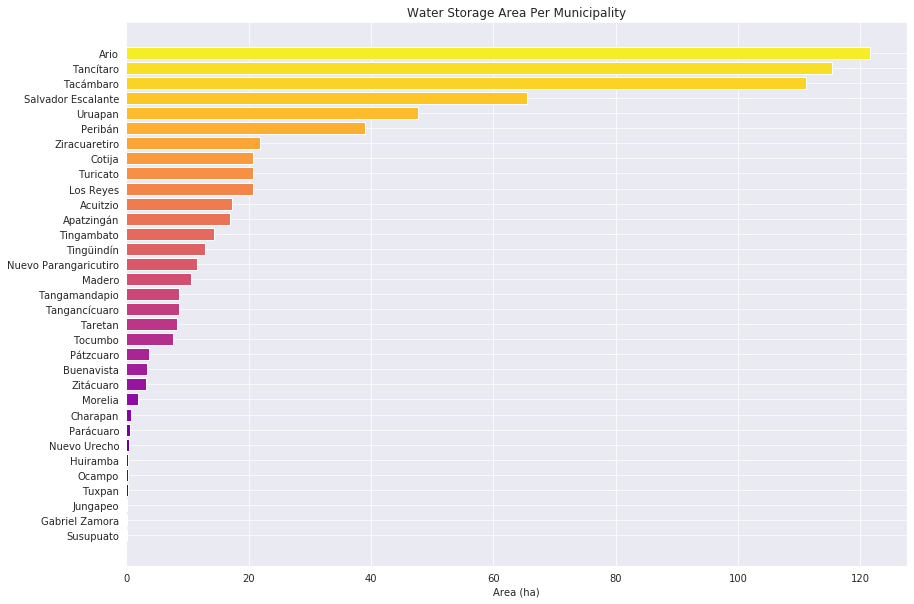

In [12]:
with sns.axes_style('darkgrid'):
    muns = inventory.Municipality[inventory.Area.sort_values().index]
    y_pos = range(len(muns))
    areas = inventory.Area[muns.index] * 1e-4
    plt.barh(y_pos, areas, color=sns.color_palette('plasma', len(muns)))
    plt.yticks(y_pos, labels=muns)
    plt.xlabel('Area (ha)')
    plt.title('Water Storage Area Per Municipality')
    plt.show()

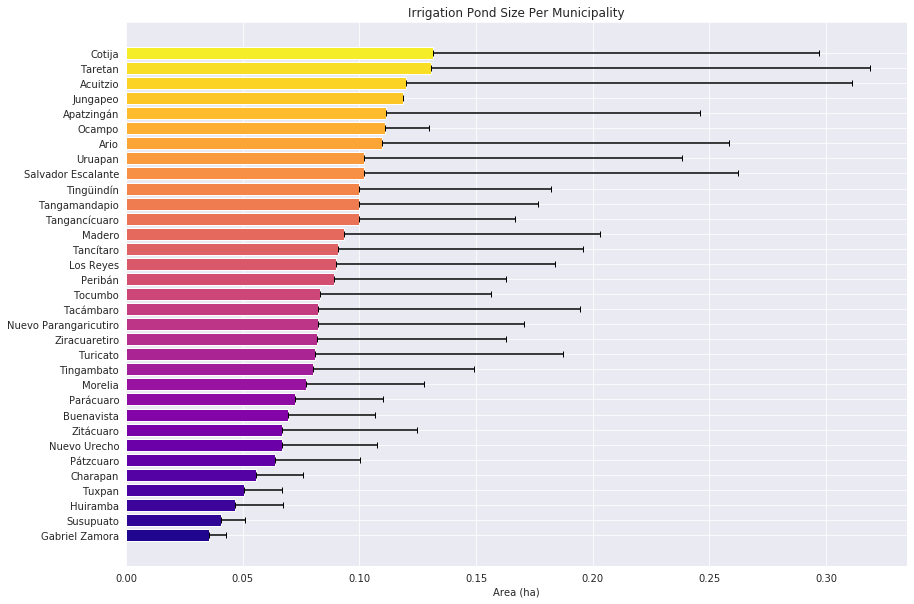

In [13]:
with sns.axes_style('darkgrid'):
    muns = inventory.Municipality[inventory.Area_mean.sort_values().index]
    y_pos = range(len(muns))
    areas = inventory.Area_mean[muns.index] * 1e-4
    stds = inventory.Area_std[muns.index] * 1e-4
    plt.barh(y_pos, areas, color=sns.color_palette('plasma', len(muns)),
             xerr=[np.zeros(len(muns)), stds], ecolor='black', capsize=3)
    plt.yticks(y_pos, labels=muns)
    plt.xlabel('Area (ha)')
    plt.title('Irrigation Pond Size Per Municipality')
    plt.show()

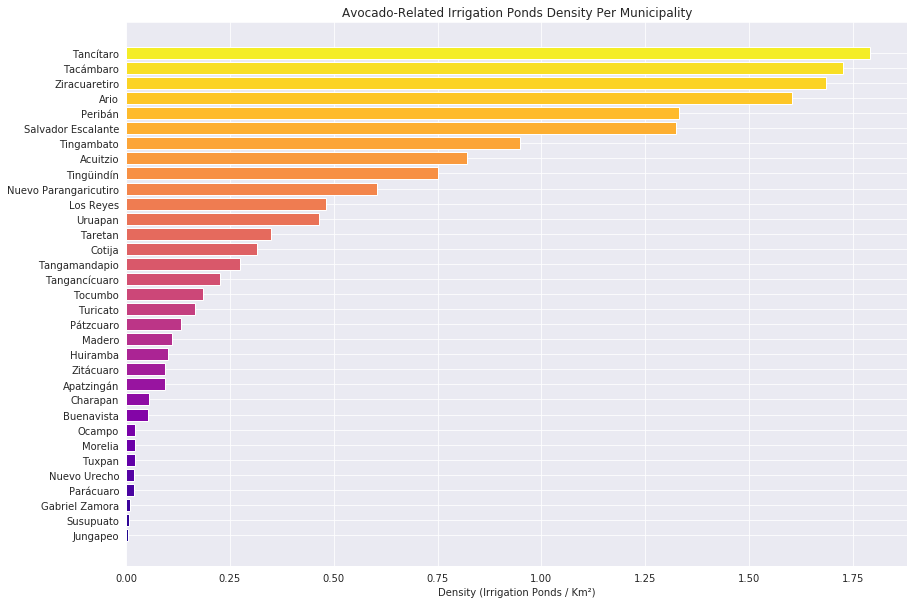

In [14]:
with sns.axes_style('darkgrid'):
    muns = inventory.Municipality[inventory.Density.sort_values().index]
    y_pos = range(len(muns))
    density = inventory.Density[muns.index]
    plt.barh(y_pos, density, color=sns.color_palette('plasma', len(muns)))
    plt.yticks(y_pos, labels=muns)
    plt.xlabel('Density (Irrigation Ponds / Km²)')
    plt.title('Avocado-Related Irrigation Ponds Density Per Municipality')
    plt.show()

---

Also, the neural network detected avocado-related water ponds in the National Park Pico de Tancitaro, <br>
which has been declared a priority zone for conservation. Fuentes (2004) mentioned a <br>
demand of irrigation water for avocado crops in the area that may cause high deficits of water. <br>
Future analysis will address the hydrological impact of this type of infrastructure.

Reference:
Fuentes, J.J.A.J., M. Bravo, E. y G. Bocco V. 2004. **Water balance and <br>
landscape degradation of an ungauged mountain watershed: Case study of the <br>
Pico de Tancitaro National Park, Michoacan, Mexico**. Journal of environmental<br>
hydrology. Vol. 12: 1-12 http://www.hydroweb.com.

---

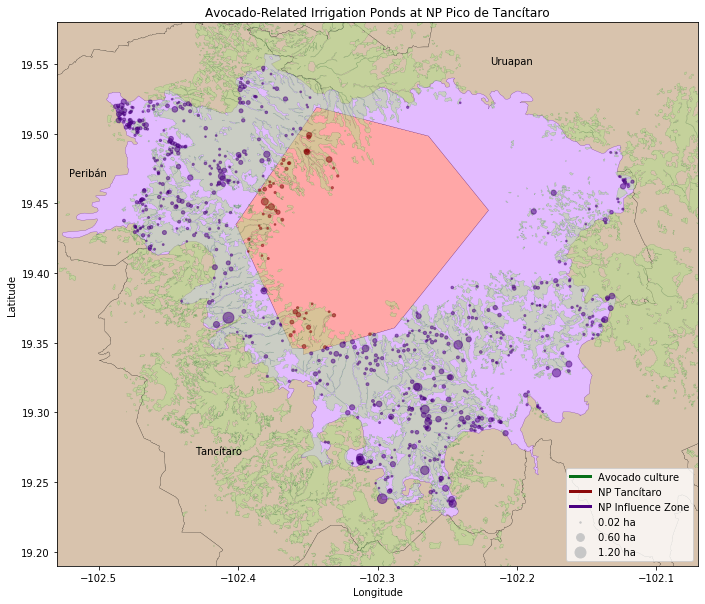

In [15]:
pna_tanci = '../Data/shapefiles/pna_tanci.shp'
iz_tanci = '../Data/shapefiles/influence_zone.shp'

pna_tanci = gpd.read_file(pna_tanci)
iz_tanci = gpd.read_file(iz_tanci)

mask1 = np.array([pna_tanci.intersects(i).iloc[0] for i in ponds.geometry])
mask2 = np.array([iz_tanci.intersects(i).iloc[0] for i in ponds.geometry])

# Plot
ax = mexico.plot(color=colors['gray'], edgecolor='black', linewidth=0.1)
michoacan.plot(color=colors['salmon'], edgecolor='black', linewidth=0.2, ax=ax)
avo_michoacan.plot(color=colors['brown'], edgecolor='black', linewidth=0.2, ax=ax)
pna_tanci.plot(color=colors['white red'], edgecolor=colors['dark red'], linewidth=0.2, ax=ax)
iz_tanci.plot(color=colors['white purple'], edgecolor=colors['dark purple'], linewidth=0.2, ax=ax)
avocado.plot(color=colors['white green'], edgecolor=colors['dark green'], linewidth=0.2, ax=ax, alpha=0.5)
ax.scatter(ponds_centroids[mask1][:,0], ponds_centroids[mask1][:,1], s=ponds_rep.area[mask1]/100, 
            alpha=0.5, c=colors['dark red'], label=None)
ax.scatter(ponds_centroids[mask2][:,0], ponds_centroids[mask2][:,1], s=ponds_rep.area[mask2]/100, 
            alpha=0.5, c=colors['dark purple'], label=None)
ax.set_xlim(-102.53, -102.07)
ax.set_ylim(19.19, 19.58)
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_title('Avocado-Related Irrigation Ponds at NP Pico de Tancítaro')
ax.text(-102.219, 19.55, 'Uruapan')
ax.text(-102.431, 19.27, 'Tancítaro')
ax.text(-102.521, 19.47, 'Peribán')

# Legend
ax.plot([],[], color=colors['dark green'], label='Avocado culture', linewidth=3)
ax.plot([],[], color=colors['dark red'], label='NP Tancítaro', linewidth=3)
ax.plot([],[], color=colors['dark purple'], label='NP Influence Zone', linewidth=3)
areas = [200, 6000, 12000]
values = [0.0, 0.5, 1.0]
for i,j in zip(areas, values):
    ax.scatter([], [], c=colors['gray'], s=i/100,
                label=f'{i*1e-4:.2f} ha', cmap='plasma')
ax.legend(loc='lower right')

plt.show()

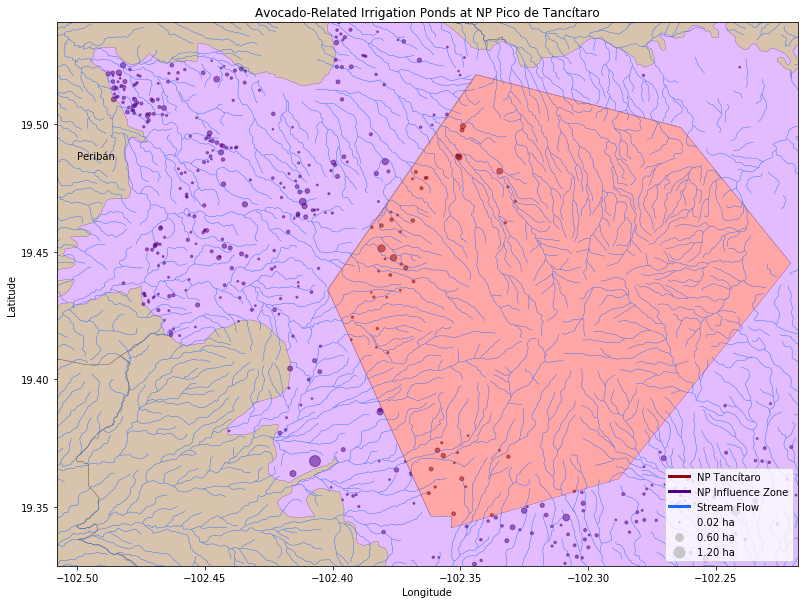

In [16]:
stream_tanci = '../Data/shapefiles/stream_flow_anp.shp'
level_tanci = '../Data/shapefiles/level_anp.shp'

stream_tanci = gpd.read_file(stream_tanci)
level_tanci = gpd.read_file(level_tanci)

# Plot
ax = mexico.plot(color=colors['gray'], edgecolor='black', linewidth=0.1)
michoacan.plot(color=colors['salmon'], edgecolor='black', linewidth=0.2, ax=ax)
avo_michoacan.plot(color=colors['brown'], edgecolor='black', linewidth=0.2, ax=ax)
pna_tanci.plot(color=colors['white red'], edgecolor=colors['dark red'], linewidth=0.2, ax=ax)
iz_tanci.plot(color=colors['white purple'], edgecolor=colors['dark purple'], linewidth=0.2, ax=ax)
stream_tanci.plot(color='#1A67FF', linewidth=0.4, ax=ax)
ax.scatter(ponds_centroids[mask1][:,0], ponds_centroids[mask1][:,1], s=ponds_rep.area[mask1]/100, 
            alpha=0.5, c=colors['dark red'], label=None)
ax.scatter(ponds_centroids[mask2][:,0], ponds_centroids[mask2][:,1], s=ponds_rep.area[mask2]/100, 
            alpha=0.5, c=colors['dark purple'], label=None)
ax.set_xlim(-102.508, -102.218)
ax.set_ylim(19.327, 19.5398)
ax.locator_params(axis='y', nbins=6)
ax.locator_params(axis='x', nbins=6)
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_title('Avocado-Related Irrigation Ponds at NP Pico de Tancítaro')
ax.text(-102.5, 19.4863, 'Peribán')

# Legend
ax.plot([],[], color=colors['dark red'], label='NP Tancítaro', linewidth=3)
ax.plot([],[], color=colors['dark purple'], label='NP Influence Zone', linewidth=3)
ax.plot([],[], color=colors['blue'], label='Stream Flow', linewidth=3)
areas = [200, 6000, 12000]
values = [0.0, 0.5, 1.0]
for i,j in zip(areas, values):
    ax.scatter([], [], c=colors['gray'], s=i/100,
                label=f'{i*1e-4:.2f} ha', cmap='plasma')
ax.legend(loc='lower right')

plt.show()

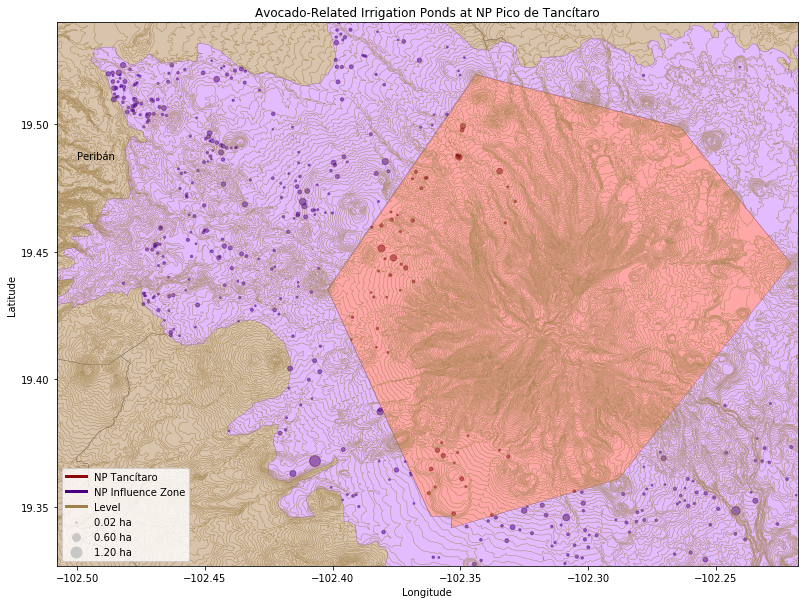

In [17]:
# Plot
ax = mexico.plot(color=colors['gray'], edgecolor='black', linewidth=0.1)
michoacan.plot(color=colors['salmon'], edgecolor='black', linewidth=0.2, ax=ax)
avo_michoacan.plot(color=colors['brown'], edgecolor='black', linewidth=0.2, ax=ax)
pna_tanci.plot(color=colors['white red'], edgecolor=colors['dark red'], linewidth=0.2, ax=ax)
iz_tanci.plot(color=colors['white purple'], edgecolor=colors['dark purple'], linewidth=0.2, ax=ax)
level_tanci.plot(color=colors['brown_'], linewidth=0.4, ax=ax)
ax.scatter(ponds_centroids[mask1][:,0], ponds_centroids[mask1][:,1], s=ponds_rep.area[mask1]/100, 
            alpha=0.5, c=colors['dark red'], label=None)
ax.scatter(ponds_centroids[mask2][:,0], ponds_centroids[mask2][:,1], s=ponds_rep.area[mask2]/100, 
            alpha=0.5, c=colors['dark purple'], label=None)
ax.set_xlim(-102.508, -102.218)
ax.set_ylim(19.327, 19.5398)
ax.locator_params(axis='y', nbins=6)
ax.locator_params(axis='x', nbins=6)
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_title('Avocado-Related Irrigation Ponds at NP Pico de Tancítaro')
ax.text(-102.5, 19.4863, 'Peribán')

# Legend
ax.plot([],[], color=colors['dark red'], label='NP Tancítaro', linewidth=3)
ax.plot([],[], color=colors['dark purple'], label='NP Influence Zone', linewidth=3)
ax.plot([],[], color=colors['brown_'], label='Level', linewidth=3)
areas = [200, 6000, 12000]
values = [0.0, 0.5, 1.0]
for i,j in zip(areas, values):
    ax.scatter([], [], c=colors['gray'], s=i/100,
                label=f'{i*1e-4:.2f} ha', cmap='plasma')
ax.legend(loc='lower left')

plt.show()

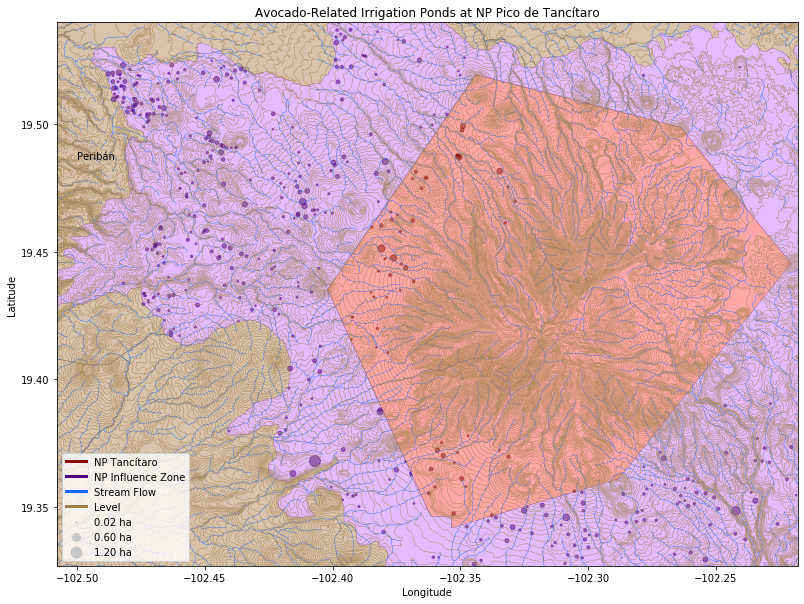

In [18]:
# Plot
ax = mexico.plot(color=colors['gray'], edgecolor='black', linewidth=0.1)
michoacan.plot(color=colors['salmon'], edgecolor='black', linewidth=0.2, ax=ax)
avo_michoacan.plot(color=colors['brown'], edgecolor='black', linewidth=0.2, ax=ax)
pna_tanci.plot(color=colors['white red'], edgecolor=colors['dark red'], linewidth=0.2, ax=ax)
iz_tanci.plot(color=colors['white purple'], edgecolor=colors['dark purple'], linewidth=0.2, ax=ax)
stream_tanci.plot(color=colors['blue'], linewidth=0.4, ax=ax)
level_tanci.plot(color=colors['brown_'], linewidth=0.4, ax=ax)
ax.scatter(ponds_centroids[mask1][:,0], ponds_centroids[mask1][:,1], s=ponds_rep.area[mask1]/100, 
            alpha=0.5, c=colors['dark red'], label=None)
ax.scatter(ponds_centroids[mask2][:,0], ponds_centroids[mask2][:,1], s=ponds_rep.area[mask2]/100, 
            alpha=0.5, c=colors['dark purple'], label=None)
ax.set_xlim(-102.508, -102.218)
ax.set_ylim(19.327, 19.5398)
ax.locator_params(axis='y', nbins=6)
ax.locator_params(axis='x', nbins=6)
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_title('Avocado-Related Irrigation Ponds at NP Pico de Tancítaro')
ax.text(-102.5, 19.4863, 'Peribán')

# Legend
ax.plot([],[], color=colors['dark red'], label='NP Tancítaro', linewidth=3)
ax.plot([],[], color=colors['dark purple'], label='NP Influence Zone', linewidth=3)
ax.plot([],[], color=colors['blue'], label='Stream Flow', linewidth=3)
ax.plot([],[], color=colors['brown_'], label='Level', linewidth=3)
areas = [200, 6000, 12000]
values = [0.0, 0.5, 1.0]
for i,j in zip(areas, values):
    ax.scatter([], [], c=colors['gray'], s=i/100,
                label=f'{i*1e-4:.2f} ha', cmap='plasma')
ax.legend(loc='lower left')

plt.show()